### 3.1 確率推論
#### 3.1.1 確率密度関数と確率質量関数
$$
{\bf x} = (x_1, x_2, ..., x_M)^T \in \mathbb{R}^M\\\\
p({\bf x}) \geq 0 \\\\
\int p(x)dx = \int ...\int p(x_1, ..., x_M)dx_1...dx_M = 1.
$$
p(x)が上の式を満たす時, p(x)を${\bf確率密度関数}$と呼ぶ  
p(x)が離散値をとる時は${\bf 確率質量関数}$と呼ぶ
#### 3.1.2 条件付き分布と周辺分布  
条件付き分布$p(x|y)$においてyはxの分布の特性を決めるパラメータのようなものであると解釈できる  
#### 3.1.3 期待値  
期待値は確率分布の特徴を定量的に表す  
2つの確率分布p(x),q(x)に対して以下のような期待値をKLダイバージェンスと呼ぶ  
$$
D_{KL} [q(x)||p(x)] = - \int q(x) \log \frac{p(x)}{q(x)} dx\\
= \mathbb{E}_{q(x)}[\log q(x)] - \mathbb{E}_{q(x)} [\log p(x)].
$$
#### 3.1.4 変数変換
既知の確率密度関数に対してy=f(x)のように変数変換を行うことで新たな確率密度関数を導出する  
既知の確率密度関数を$p_x({\bf x})$とすると, 変換によって得られる確率密度関数は  
$$
p_y({\bf y}) = p_x(g(y))|det({\bf J})|
ただし{\bf J}はfの逆関数gのヤコビ行列でありdet(J)はJの行列式
$$
#### 3.1.5 グラフィカルモデル  
DAG(directed acyclic graph)
- ループ構造を持たない有向グラフ  
$$
p({\bf X}, \theta) = p(\theta)p({\bf X}|\theta)
$$
$p(\theta)$を事前分布、$p({\bf X}|\theta)$を尤度関数と呼ぶ  

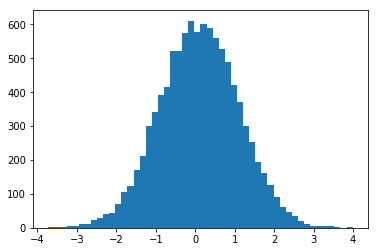

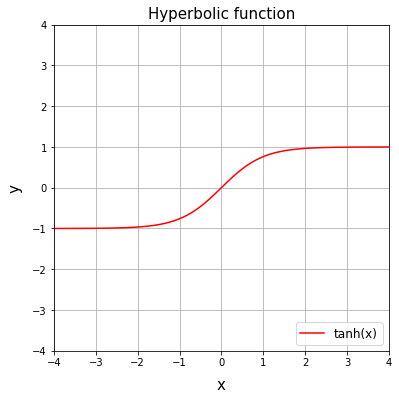

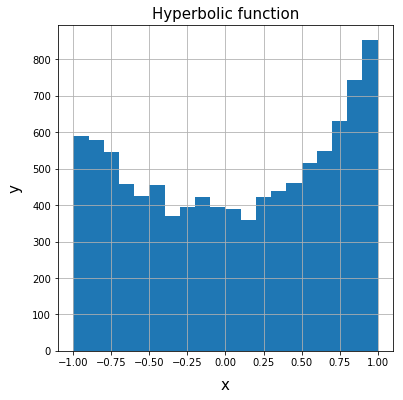

In [67]:
import matplotlib.pyplot as plt
import math
import numpy as np

x1 = np.random.normal(0.1, 1.0, 10000)
plt.hist(x1,bins=50)
plt.show()

x2 = np.linspace(-4, 4, 100)
y2 = np.tanh(x2)
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)
ax.grid()
ax.set_title("Hyperbolic function", size = 15)
ax.set_xlabel("x", size = 15, labelpad = 10)
ax.set_ylabel("y", size = 15, labelpad = 10)
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.plot(x2, y2, color = "red", label = "tanh(x)")

ax.legend(loc = "lower right", fontsize = 12)
plt.show()
y1 = np.tanh(x1)
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)
ax.grid()
ax.set_title("Hyperbolic function", size = 15)
ax.set_xlabel("x", size = 15, labelpad = 10)
ax.set_ylabel("y", size = 15, labelpad = 10)
plt.hist(y1, bins=20)
plt.show()

### 3.2 指数型分布族
ガウス分布やディリクレ分布などの確率分布は指数型分布族と呼ばれる  
#### 3.2.1 確率分布の例
- ガウス分布
    - p62
- ベルヌーイ分布
    - p49
- カテゴリ分布
    - p52
- ガンマ分布
    - p60
#### 3.2.3.1 指数型分布族の定義  
$$
p({\bf x}|{\bf \eta}) = h({\bf x}) exp({\bf \eta} ^T t({\bf x}) -a({\bf \eta})).
$$
の形式で書ける確率分布の族を指数型分布族と呼ぶ  
$\eta$を自然パラメータ  
$t(x)$を十分統計量  
$h(x)$を基底測度  
$a( \eta)$を対数分配関数と呼ぶ  
対数分配関数は$a(\eta) = \log h(x)exp(\eta ^T t(x))dx$が積分して1になることを保証するためのもの  
#### 3.2.3.3 対数分配関数と十分統計量の関係  
対数分配関数$a(\eta)の$\eta$に関する勾配は十分統計量$t(x)$の期待値になる

### 3.3 ベイズ線形回帰
線形回帰モデルを使ってベイズ推論によるモデルの学習とテストデータの予測をする  
#### 3.3.1 モデル  
$$
p(Y, w | X) = p(w)p(Y|X,w) = p(w) \prod_{n=1}^N p(y_n|x_n, w)\\
p(y_n|x_n,w) = N(y_n|w^T \phi (x_n), \sigma^2_y).
$$
ガウス分布の平均値は特徴量関数$\phi$によって決定されているとして  
重みパラメータ$w$を学習したい  
重みパラメータwに事前分布として
$$
p(w) = N(w|0, \sigma ^2_{w} {\bf I}).
$$を与える  
ベイズ線形回帰ではモデルからの関数$f(x;w) = w^T \phi (x)$のサンプルが取れる  
→データ観測以前に候補となる関数を事前分布からサンプリングすることによってモデルで想定されている関数の具体例を示すことができる
#### 3.3.2.3 最尤推定との比較 
最尤推定ではデータ数が増加しても予測の直線はほとんど変化しない  
ベイズ推論で計算した予測分布は観測されたデータに応じて適切に都速の不確実性が変化している
#### 3.3.4 逐次学習  
ベイズ推論によるモデルの学習では事後分布によって学習結果を保存することにより新規に入っていくる学習データに適応的に学習を進めることができる  
-> 逐次学習と呼ぶ  
データを逐次的に与えた場合と一度に全て与えた場合とで最終的に得られる事後分布は一致する(データの生成過程に順序の依存性を仮定しない場合)  
ニューラルネットワーク等の複雑なモデルでは逐次学習の各更新で重みパラメータwの事後分布が解析的に計算できなくなる  
->モーメントマッチングなる手法で近似的に更新できるように(4章で出てくる)  
#### 3.3.5 能動学習  
効率的に学習用のラベルデータを収集する  
1. ラベルのついていない入力集合$X_{pool}$から適切な入力データ点$x_q$を選ぶ
2. 人間などのアノテーターからラベル$y_q$を得る  
3. 予測分布の更新  

新しい入力データ点を与え時の予測の不確かさが大きいものを入力データ点として選びたい  
->予測分布のエントロピーが最大になるような入力$x_q$を選ぶ  
$$
x_q = argmax \{ F(x_*)\},\\
F(x_*) = - \mathbb{E}_{p(y_*|x_*, Y, X)} [\log p(y_*|x_*, Y, X)]
$$
->予測がガウス分布になる場合には予測分布の分散が大きくなるようなデータ点を$X_{pool}$から選ぶと良い  
このような予測の不確実性を利用した能動学習をベイズ最適化と呼ぶ  
->課題に関する事前知識が与えにくいようなブラックボックス関数の最適化を目的としているので予測対象に関して弱い仮定を設定できるガウス過程を用いるのが一般的  

### 最尤推定, MAP推定との関係
#### 3.4.1 最尤推定と誤差最小化  
線形回帰の場合はパラメータwに関する対数尤度関数の最大化は誤差関数の最大化と一致する  
$$
\log p(Y|X, W) = \frac{1}{2} \sigma_y^{-2} \sum_{n=1}^N \{ y_n - f(x_n ; w) \}^2 + c \\
E(w) = \frac{1}{2} \sum_{n=1}^N \{ y_n - {\bf w}^T {\bf \phi} (x_n) \}^2
$$
#### 3.4.2 MAP推定と正則化  
最大事後確率推定(MAP推定)
MAP推定ではパラメータの事後分布をwの関数と見た時、その関数の最大値をとるようなwを探索する  
MAP推定はパラメータや予測値を分布でなく１点で推定を行うため、点推定と呼ぶ  
->条件付き分布や周辺分布など確率計算のみに基づくベイズ推論とは区別する  